In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("deep")
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 12

if not os.path.exists("images"):
    os.makedirs("images")

In [ ]:
# 2. Loading the Dataset directly from URL

# 2.a. Display loading message
print("Loading the Titanic dataset from URL...")

# 2.b. Define dataset URL
url = (
    "https://web.stanford.edu/class/archive/cs/cs109/"
    "cs109.1166/stuff/titanic.csv"
)

Loading the Titanic dataset from URL...


In [ ]:
# 2.c. Download and load into DataFrame
df = pd.read_csv(url)

In [ ]:
# 3. Checking the dataset shape (rows, columns)

# 3.a. Display shape using tuple format
print(f"Dataset dimensions: {df.shape}")
# -----> Dataset dimensions: (887, 8)

# 3.b. Display shape with explicit row and column count
rows, columns = df.shape
print(f"The dataset contains {rows} rows and {columns} columns.")
# -----> The dataset contains 887 rows and 8 columns.

Dataset dimensions: (887, 8)
The dataset contains 887 rows and 8 columns.


In [ ]:
# 4. Understanding the Dataset Structure

# 4.a. Display section title
print("\n--- Dataset Structure ---")

# 4.b. Show first 5 rows
print("Displaying the first 5 rows of the dataset:")
print(df.head())


--- Dataset Structure ---
Displaying the first 5 rows of the dataset:
   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  


In [ ]:
# 5. Displaying column names

# 5.a. Show all column names as a list
print("\nColumn names in the dataset:")
print(df.columns.tolist())


Column names in the dataset:
['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']


In [ ]:
# 6. Checking data types and missing values

# 6.a. Display section title
print("\n--- Data Types and Missing Values ---")

# 6.b. Show dataset info (types, non-null counts, memory usage)
print(df.info())


--- Data Types and Missing Values ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB
None


In [ ]:
# 7. Are there missing values?
missing_values = df.isna().sum()
print("\nMissing values in each column:")
print(missing_values)

# 7.b. Conditional message based on total missing values
if missing_values.sum() > 0:
    print(f"\nTotal missing values: {missing_values.sum()}")
    print("The dataset contains missing values that need to be addressed.")
else:
    print("\n The dataset doesn't contain any missing values.")


Missing values in each column:
Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

 The dataset doesn't contain any missing values.


In [ ]:
# 8. Statistical Summary
print("\n--- Statistical Summary ---")
print(df.describe())


--- Statistical Summary ---
         Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.000000  887.000000               887.000000   
mean     0.385569    2.305524   29.471443                 0.525366   
std      0.487004    0.836662   14.121908                 1.104669   
min      0.000000    1.000000    0.420000                 0.000000   
25%      0.000000    2.000000   20.250000                 0.000000   
50%      0.000000    3.000000   28.000000                 0.000000   
75%      1.000000    3.000000   38.000000                 1.000000   
max      1.000000    3.000000   80.000000                 8.000000   

       Parents/Children Aboard       Fare  
count               887.000000  887.00000  
mean                  0.383315   32.30542  
std                   0.807466   49.78204  
min                   0.000000    0.00000  
25%                   0.000000    7.92500  
50%                   0.000000   14.45420  
75%                   0.000000  

Exploratory Analysis: Uncovering Patterns
Now, let’s dive deeper into individual variables and their relationship with survival.

Target Variable: Survival
First, let’s examine the distribution of our target variable, Survived.


In [ ]:
# 9. Understanding the Target Variable: Survival

# 9.a. Count of survivors vs. non-survivors
survival_counts = df['Survived'].value_counts()
survival_counts

,count
Survived,
0,545
1,342


In [ ]:
# 9.b. Percentage distribution of survival
survival_percentage = df['Survived'].value_counts(normalize=True) * 100
survival_percentage

,proportion
Survived,
0,61.443067
1,38.556933


In [ ]:
# 9.c. Overall survival rate
overall_survival_rate = float(df['Survived'].mean() * 100)
overall_survival_rate

38.55693348365276

/tmp/ipython-input-2003846057.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
/tmp/ipython-input-2003846057.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


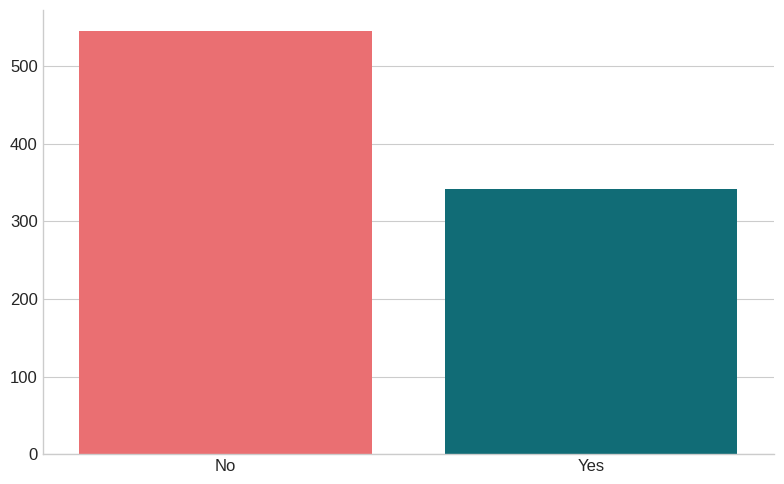

In [ ]:
# 10.a. Minimalist survival distribution plot

# Create the figure with a defined size
plt.figure(figsize=(8, 5))

# Count plot of the 'Survived' column
# '0' means did not survive, '1' means survived
ax = sns.countplot(
    x='Survived',
    data=df,
    hue=None,
    palette=['#FF5A5F', '#007A87']  # Red for No, Blue for Yes
)

# Remove chart title and axis labels for a cleaner look
ax.set_title("")
ax.set_xlabel("")
ax.set_ylabel("")

# Replace 0 and 1 with readable labels
ax.set_xticklabels(['No', 'Yes'])

# Remove top and right borders
sns.despine()

# Adjust layout to avoid padding issues
plt.tight_layout()

Gender Analysis
Did gender play a role in survival? The “women and children first” protocol suggests it might have.

In [ ]:
# 11.a. Calculate survival rate by gender

# Group by gender and calculate the mean survival rate
# Multiply by 100 to convert to percentage
gender_survival = df.groupby('Sex')['Survived'].mean() * 100
gender_survival

,Survived
Sex,
female,74.203822
male,19.022688


/tmp/ipython-input-3231358664.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Female', 'Male'])


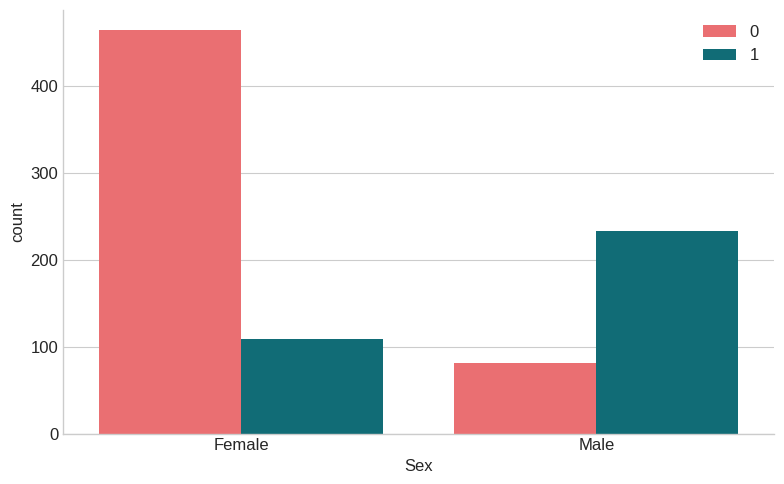

In [ ]:
# 11.b. Survival by gender (simple visualization)

plt.figure(figsize=(8, 5))

# Red = did not survive, Blue = survived
ax = sns.countplot(
    x='Sex',
    hue='Survived',
    data=df,
    palette=['#FF5A5F', '#007A87']
)

# Minimal labels and clean layout
ax.set_xticklabels(['Female', 'Male'])
ax.legend_.set_title("")

sns.despine()
plt.tight_layout()

Passenger Class Analysis
Did socioeconomic status, represented by passenger class, influence survival?

In [ ]:
# 12.a. Survival rate by passenger class

class_survival = df.groupby('Pclass')['Survived'].mean() * 100
class_survival

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.435318


/tmp/ipython-input-1668000584.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['1st', '2nd', '3rd'])


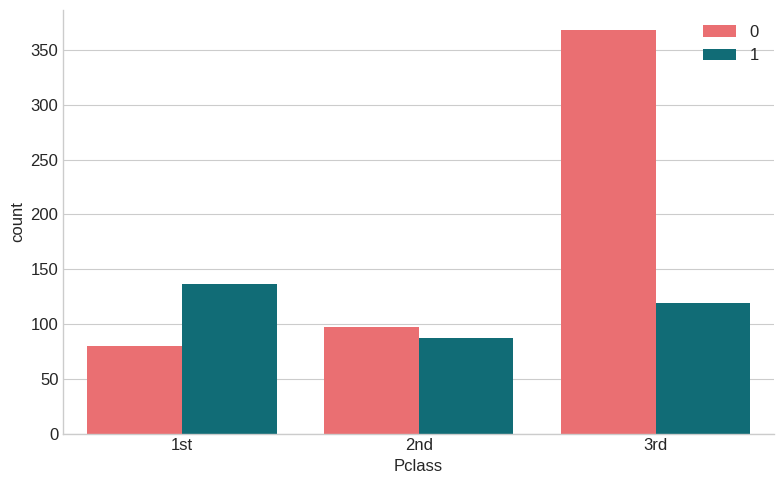

In [ ]:
# 12.b. Minimalist survival by class

plt.figure(figsize=(8, 5))

ax = sns.countplot(
    x='Pclass',
    hue='Survived',
    data=df,
    palette=['#FF5A5F', '#007A87']
)

ax.set_xticklabels(['1st', '2nd', '3rd'])
ax.legend_.set_title("")

sns.despine()
plt.tight_layout()

There’s a clear hierarchy: 63.0% of 1st class passengers survived, compared to 47.3% of 2nd class and only 24.4% of 3rd class passengers. Higher class meant better chances of survival.

Age Distribution Analysis
Let’s examine the age distribution of passengers and its relation to survival.

In [ ]:
# 13.a. Summary statistics for age (formatted horizontally)

age_stats = df['Age'].describe().round(2).to_frame().T
age_stats

,count,mean,std,min,25%,50%,75%,max
Age,887.0,29.47,14.12,0.42,20.25,28.0,38.0,80.0


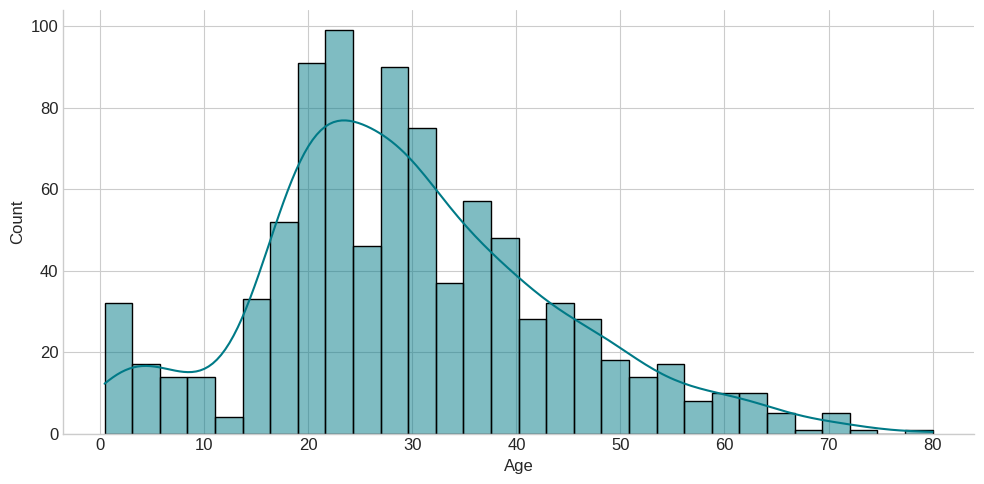

In [ ]:
 #13.b. Age distribution plot

plt.figure(figsize=(10, 5))

sns.histplot(
    df['Age'],
    bins=30,
    kde=True,
    color='#007A87'
)

sns.despine()
plt.tight_layout()

In [ ]:
# 14.a. Create age categories

df['Age_Category'] = pd.cut(
    df['Age'],
    bins=[0, 12, 18, 35, 60, 100],
    labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
)

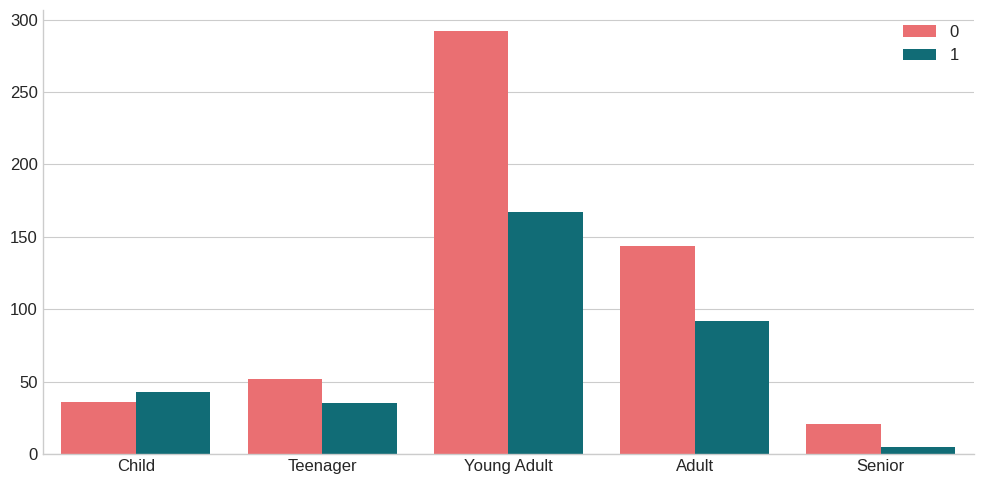

In [ ]:
# 14.b Plot survival by age category

plt.figure(figsize=(10, 5))

ax = sns.countplot(
    x='Age_Category',
    hue='Survived',
    data=df,
    palette=['#FF5A5F', '#007A87']
)

ax.set_xlabel("")
ax.set_ylabel("")
ax.legend_.set_title("")
sns.despine()
plt.tight_layout()

Fare Analysis
Does the ticket price correlate with survival?

In [ ]:
# 15.a. Fare summary statistics (rounded, horizontal)

fare_stats = df['Fare'].describe().round(2).to_frame().T
fare_stats

,count,mean,std,min,25%,50%,75%,max
Fare,887.0,32.31,49.78,0.0,7.92,14.45,31.14,512.33


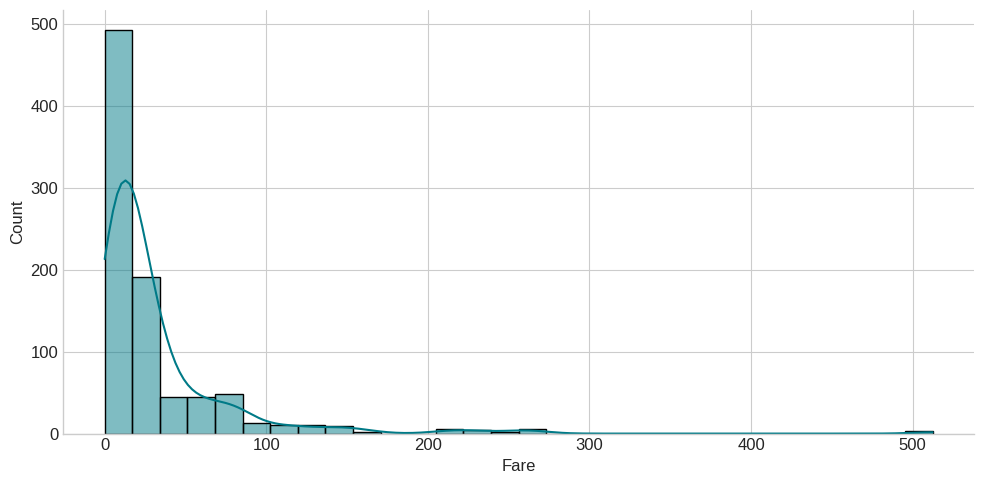

In [ ]:
# 15.b. Fare distribution plot

plt.figure(figsize=(10, 5))

sns.histplot(
    df['Fare'],
    bins=30,
    kde=True,
    color='#007A87'
)

sns.despine()
plt.tight_layout()

In [ ]:
# 16.a. Create fare categories (quartiles)

df['Fare_Category'] = pd.qcut(
    df['Fare'],
    q=4,
    labels=['Low', 'Medium-Low', 'Medium-High', 'High']
)

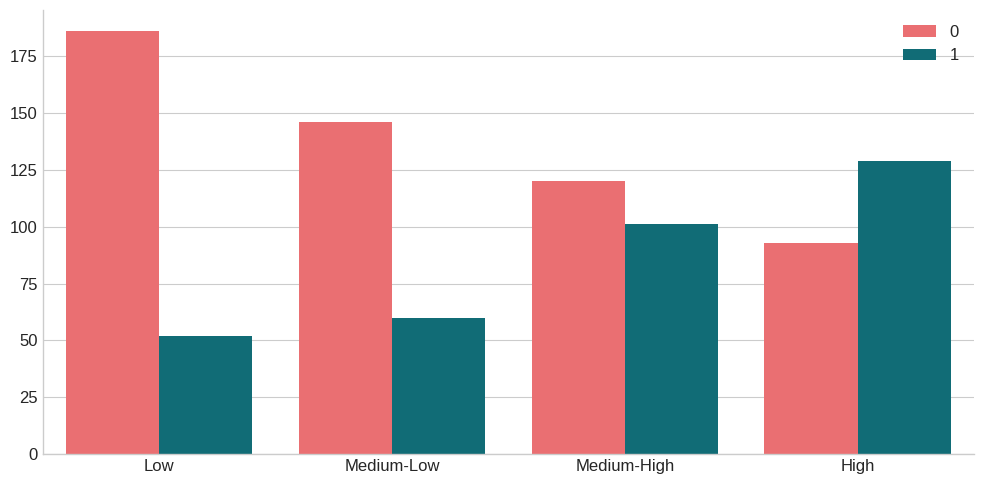

In [ ]:
# 16.c. Plot survival by fare category

plt.figure(figsize=(10, 5))

ax = sns.countplot(
    x='Fare_Category',
    hue='Survived',
    data=df,
    palette=['#FF5A5F', '#007A87']
)

ax.set_xlabel("")
ax.set_ylabel("")
ax.legend_.set_title("")

sns.despine()
plt.tight_layout()